%%latex
In a previous article we looked at graphical methods of normality testing. We looked at how to plot histograms and QQ plots. We also looked how to compare data from other distributions to a normal distribution. While graphical tests are one approach to test for normality in data, another approach is to use statistical tests to check for normality. Statistical tests provide a quantitative picture compared to graphical tests however factors like the sample size and large deviations in the data set can yield wrong results hence care must be taken while interpreting statistical tests. 

In this notebook we are going to cover the following statistical tests: 

1) Shapiro Wilks test

2) Anderson Darling test

3) Lilliefors test 


While there are many other test for normality, we are going to focus on these 3 as simple examples of how normality tests can be conducted. We pick these test based on their power. Statistical power is the probability of a test to make type 2 errors. The higher the probability that it will make type 2 errors, the less power the test has. In our selection the Shapiro-Wilks test has the highest power, followed by the Anderson Darling and Lilliefors test.




## 1) Shapiro Wilks test

The Shapiro Wilks test for normality is considered a powerful test for normality. For a dataset values given by
$ \mathbf{x} = (x_1,x_2, x_3 ... x_N) $, we have the following test statistic: 

$$ W  =  \dfrac{\big(\sum_{i=1}^{N} a_i {x^{`}}_i\big)^2}{\sum_{i=1}^{N}(x_i - \bar x)^2}  $$  


where $ x^{`}$  are ordered statistics, meaning we arrange the values in  $\bf x$  from lowest to highest<br>

$ a_i$'s are coefficient which we determine from the covariance matrix and expected value of order statistics. You can learn more about it here [[1]](http://www.math.utah.edu/~morris/Courses/ShapiroWilk.pdf).

$\bar x$ is the mean of all the $\bf x$ values 

Thankfully we do not have to compute the test statistic directly, python has a package for running the Shapiro-Wilks test. 

Let us generate 100 samples from a normal distribution to for this and other tests. 


In [23]:
# all imports
import numpy as np 
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd 

import plotly.graph_objs as go
import plotly_express as px 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
import scipy.stats as sps

init_notebook_mode(connected=True)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [2]:
# generating a random sample of size 100 in numpy 

# set seed so the same set of random numbers are generated 
np.random.seed(1)

# sample 100 values from a normal distribution 
normal_sample = np.random.randn(100)  

# running the shapiro wilks test
print(stats.shapiro(normal_sample)) 


(0.9920045137405396, 0.8215526342391968)


The Shaprio-Wilks test is a package in scipy which outputs 2 values. W which is the test statistic and the p-value of the test. The test statistic W  is close to 1 if the data approximates a normal distribution and is 0 otherwise. 

The null all the alternate hypothesis for test are: 

* H0: The sample was drawn from a normal distribution <br>
    if p-value > significance level
    

* H1: Unable to conclude that the sample was drawn from a normal distribution  <br>
    if p-value < significance level 
    
In the above example, the p-value is greater than the significance level, hence the null hypothesis should be accepted saying that data comes from a normal distribution.  
    
There are certain limitation to keep in mind when using the Shapiro-Wilks test: 

1) Shapiro Wilks test is known to work well for small datasets. A note about the scipy implementation states it can be used for samples upto 5000. Above that while the W statistic is accurate the p-value may not.[[2]](https://github.com/scipy/scipy/blob/v1.3.3/scipy/stats/morestats.py#L1593-L1662) 

2) It does not do well when you have repeated values in your dataset. 


## 2) The Anderson-Darling test 
 The Anderson-Darling test uses the "distance" between cumulative distribution of the data set and the cumulative distribution of a normal distribution. For a given data set $\bf X$, the test statistic for the Anderson-Darling test is: 
 
 $$A^2  = - N- \sum_{i=1}^{N} \dfrac{2i-1}{N} [ln(F(X_i))+ ln(1-F(X_{N+1-i}))] $$
 
 where $F$ is the specified distribution. Meaning F is the distribution with which the data is being compared. In case of a normality test, this is the normal distribution hence $F$ will be the normal distribution.

N is the total number of data points in the dataset. Note that the $\bf X$ values have to be ordered. 

Scipy has an implementation of the Anderson Darling test but unlike Shapiro Wilks the Anderson-Darling test outputs the test statistic and a set significance levels and their corresponding critical values. Look at the code below to see the output.  


In [3]:
# running the anderson darling test on the same sample as the Shapiro-Wilks test
print(stats.anderson(normal_sample))

AndersonResult(statistic=0.2196508855594459, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


The test statistic is 0.21 and the critical values for the significance level of 15%, 10%, 5%, 2.5%  and 1% are given. The null and the alternate hypothesis for normality are given as: 

* H0: The sample was drawn from a normal distribution <br> 
    if  $A^2$ < chosen critical value 

* H1:  Unable to conclude that the sample was drawn from a normal distribution  <br>
   if  $A^2$ > chosen critical value
   
   
Looking at the test statistic of 0.2196 the conclusion would be that the comes from a normal distribution since the test statistic is smaller than all the critical values


The main limitation of the Anderson Darling test is that it does not have the same power as Shapiro-Wilks test.


## 3) Lilliefors test

Both the Lilliefors test and Anderson Darling tests are a modification to another popular test of normality called the Kolomogorov-Smirnov (KS) test. The Lilliefors test is a little more closely related to the KS test since the test statistic is almost the same as KS test. The following steps have to be followed to conduct the Lilliefors: 

1) Convert you data to z-scores. To do that calculate the mean and standard deviation and for each x value do- 
    
$$ z = \frac{x - \bar x}{s} $$
    
where $\bar x$ is the mean value of the dataset $\mathbf x$ 
$s$ is the standard deviation of the dataset 
    
2) Convert the z scores to an empirical cumulative distribution 
3) To calculate the test statistic, first the absolute value of the difference between the empirical cumulative distribution and the cumulative distribution from a standard normal is taken. 

$$  \text{D} =  ( \text{ECDF}(z_i) - \text{CDF}(z_i) ) $$ 

4) D will not be a single number but an array of numbers the size of the dataset. Once D is calculated then test statistic is defined as: 

$$  \text{T} = \text{max(D)} $$

The null and the alternate hypothesis can be defined as: 

* H0: The empirical distribution is normal
        if T < critical value 

* H1: Unable to conclude that the empirical distribution is normal 
        if T > critical value 
        
The critical value comes from tables such as these [[3]](http://www.real-statistics.com/statistics-tables/Lilliefors-test-table/). Since the table data is limited and calculating critical values would be challenging each time, python provides P-values for the Lilliefors test. Hence the null hypothesis is accepted if the p-value is greater than a significance level or rejected if it is less than the significance level. 

Below is the code on how to run a Lilliefors test in Python



In [4]:
# import Lilliefors test from Stats model 
from statsmodels.stats import diagnostic

print(diagnostic.lilliefors(normal_sample))


(0.04330972976650932, 0.2)


The first value in the print statement is the Lilliefors test statistic and the second value is the p-value. If we select a significance level of 0.05 then since the p-value is larger than the significance level, the null hypothesis is accepted concluding that the data comes from a normal distribution.

The Lilliefors test is the weakest of all the tests that have been discussed so far. 

## Practical application of normality tests 

So far we have seen three statistical tests and how to implement them in python. We have also seen graphical methods of identifying normality in this [previous article](https://towardsdatascience.com/normality-testing-the-graphical-way-20902abd8543). A useful exercise would be to take some real data see how well these methods hold up.

Let us look at three different datasets and try to identify if the data is normal or not.

The three examples will be: 
1) Distribution of SAT writing scores 




###  1) Distribution of SAT writing scores
  
  Our first example is are the average SAT scores by school for California (You can find the dataset [here](https://data.world/education/california-sat-report-2015-2016/workspace/file?filename=SAT+Report+2015-2016.xls)). The first step is to import the data. Then visualize it with a histogram and QQ plot. Following this all three statistical tests will be applied to the data to check for normality. 
  
  Starting out by importing the data. 
  


In [40]:
## visualizing a histogram

# import data from excel file
sat_scores_data = pd.read_excel("SAT__2015_2016.xls")

# drop nans and cleaning the data, converting strings to numeric values
write_score = sat_scores_data["AvgScrWrit"].dropna()
write_score_cleaned = write_score[write_score!="*"]
write_score_cleaned = pd.to_numeric(write_score_cleaned)



# callback function for the slider
def change_bins(number_bins):

    # plotly express histogram 
    return px.histogram(write_score_cleaned.to_frame(name="avgscrwrite"), x="avgscrwrite", nbins=int(number_bins), title="Figure 1")


slider_obj =  widgets.FloatSlider(value=10, min=10, max=100,step=5, description="Num of bins", continuous_update=False)
interact(change_bins, number_bins=slider_obj);

interactive(children=(FloatSlider(value=10.0, continuous_update=False, description='Num of bins', min=10.0, st…

A visual inspection of the histogram may lead one to naively conclude that the dataset is approximately normal. To further explore, let us see the results of a qq plot. We can use the statsmodels to quickly plot qq plots as shown below.




<IPython.core.display.Javascript object>


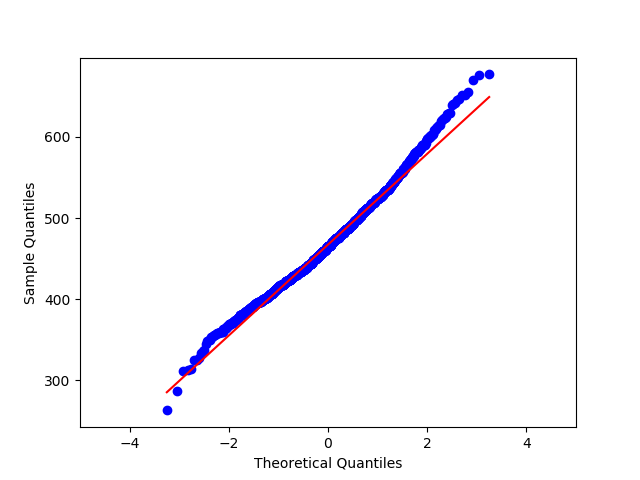

In [43]:
%matplotlib notebook
fig = sm.qqplot(write_score_cleaned.values, sps.distributions.norm, loc=0, scale=1, line="q")
plt.xlim([-5,5])
plt.show()

The sample quantile values (the blue points) should fall along the red line to conclude that the data is sampled from a normal distribution. However, while some points in the center fall on  the red line, most do not. It may be prudent to conclude that the data does not come from a normal distribution. 

From the histogram it seems that the data is approximately normal with outliers, with the qq plot the data does not seem to come from a normal distribution. The inform our decision better, the statistical tests can be brought in. Applying at three statistical tests, we get: 


In [46]:
print("Shaprio-Wilks test results \n {} \n".format(stats.shapiro(write_score_cleaned.values)))
print("Anderson-Darling test results \n {} \n".format(stats.anderson(write_score_cleaned.values)))
print("Lilliefors test results \n {} \n" .format(diagnostic.lilliefors(write_score_cleaned.values)))

Shaprio-Wilks test results 
 (0.9895123243331909, 7.451100292321655e-10) 

Anderson-Darling test results 
 AndersonResult(statistic=4.484630057395634, critical_values=array([0.575, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ])) 

Lilliefors test results 
 (0.035721183196377126, 2.3509445434886582e-05) 



The Shapiro-Wilks test yields an extremely small p-value which is less than 0.5 hence the null hypothesis must be rejected. In the Anderson-Darling test the test statistic is large compared to the larger significance level value which means the null hypothesis has to be rejected, and finally in case of the Lilliefros test the p-value is extremely small as well meaning that the null hypothesis must be rejected.

Here is a summary of the conclusions:

1) Histogram: Looks approximately normal 
2) qq plot:  Points do not fall on line, hence possibly non-normal 
3) Shapiro-Wilks test: Reject Null hypothesis
4) Anderson-Darling test: Reject Null hypothesis 
5) Lilliefors Test: Reject Null hypothesis 


Looking at these conclusions it is safe to conclude that the data does not come from a normal distribution. Although the histogram looked approximately normal, the qq plot does not reflect normality and all the tests fail to conclude that comes from a normal distribution.




## Rough notes 


In [6]:
import scipy.stats as stats 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

# np.random.seed(1)
# normal_dist_samples = [np.random.randn(10) for x in range(0,50000)] 
# shapiro_results = [stats.shapiro(x) for x in normal_dist_samples]
# shapiro_w = [x[0] for x in shapiro_results]
# import plotly.graph_objects as go
# fig = go.Figure(data=[go.Histogram(x=shapiro_w, cumulative_enabled=True,histnorm='probability density')])
# fig.show()


In [7]:
# %matplotlib notebook

# plt.hist(shapiro_w, density=True, cumulative=True, bins=200);


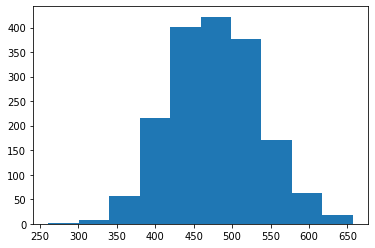

In [8]:
sat_scores_data = pd.read_excel("SAT__2015_2016.xls")

read_score = sat_scores_data["AvgScrRead"].dropna()
read_score_cleaned = read_score[read_score!="*"]

read_score_cleaned = pd.to_numeric(read_score_cleaned)
plt.hist(read_score_cleaned.values, bins=10)
plt.show()

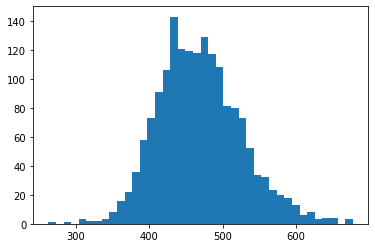

In [9]:
math_score = sat_scores_data["AvgScrWrit"].dropna()
math_score_cleaned = math_score[math_score!='*']
math_score_cleaned = pd.to_numeric(math_score_cleaned)
plt.hist(math_score_cleaned.values, bins=40)
plt.show()

In [10]:
sat_scores_data

,cds,rtype,sname,dname,cname,enroll12,NumTstTakr,AvgScrRead,AvgScrMath,AvgScrWrit,NumGE1500,PctGE1500,year
0,0,X,NaN,NaN,NaN,492835,214262,484,494,477,89840,41.93,1516
1,1000000000000,C,NaN,NaN,Alameda,16662,8611,517,534,515,4696,54.53,1516
2,1100170000000,D,NaN,Alameda County Office of Education,Alameda,263,95,395,378,388,6,6.32,1516
3,1100170112607,S,Envision Academy for Arts & Technology,Alameda County Office of Education,Alameda,88,92,391,376,386,5,5.43,1516
4,1611190000000,D,NaN,Alameda Unified,Alameda,858,472,527,543,514,301,63.77,1516
5,1611190106401,S,Alameda Science and Technology Institute,Alameda Unified,Alameda,37,35,572,612,530,30,85.71,1516
6,1611190119222,S,Nea Community Learning Center,Alameda Unified,Alameda,25,14,*,*,*,*,*,1516
7,1611190130229,S,Alameda High,Alameda Unified,Alameda,381,255,539,562,533,180,70.59,1516
8,1611190130609,S,Alameda Community Learning Center,Alameda Unified,Alameda,52,46,538,539,516,30,65.22,1516
9,1611190130625,S,Alternatives in Action,Alameda Unified,Alameda,31,17,366,365,359,0,0.00,1516
